### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import yfinance as yf
import datetime as dt
import pandas as pd
key="4f8693e94e9fcd9263c87898897c7da04213bb4c"

In [3]:
start = dt.datetime(2022, 10, 20)
end=dt.datetime.today()
start,end

(datetime.datetime(2022, 10, 20, 0, 0),
 datetime.datetime(2023, 10, 1, 23, 18, 53, 657938))

In [4]:
symbol="GOOG"

In [5]:
# df = pdr.get_data_tiingo(symbol,api_key=key)

In [6]:
df=yf.download(symbol,start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28988700
2022-10-24,102.089996,103.099998,100.300003,102.970001,102.970001,24680800
2022-10-25,103.300003,105.099998,103.019997,104.930000,104.930000,29910200
2022-10-26,96.760002,98.540001,94.570000,94.820000,94.820000,71504300


In [7]:
# df.to_csv('AAPL.csv')
# df=pd.read_csv('GOOG.csv')

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28988700
2022-10-24,102.089996,103.099998,100.300003,102.970001,102.970001,24680800
2022-10-25,103.300003,105.099998,103.019997,104.930000,104.930000,29910200
2022-10-26,96.760002,98.540001,94.570000,94.820000,94.820000,71504300


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,130.770004,132.220001,130.029999,132.169998,132.169998,14650000
2023-09-26,130.914001,131.404999,128.190002,129.449997,129.449997,20378800
2023-09-27,129.440002,131.720001,129.380005,131.460007,131.460007,18764200
2023-09-28,130.690002,134.179993,130.690002,133.130005,133.130005,18201400
2023-09-29,134.080002,134.889999,131.320007,131.850006,131.850006,23224200


In [10]:
df1=df.reset_index()['Close']

In [11]:
df1

0      100.529999
1      101.480003
2      102.970001
3      104.930000
4       94.820000
          ...    
232    132.169998
233    129.449997
234    131.460007
235    133.130005
236    131.850006
Name: Close, Length: 237, dtype: float64

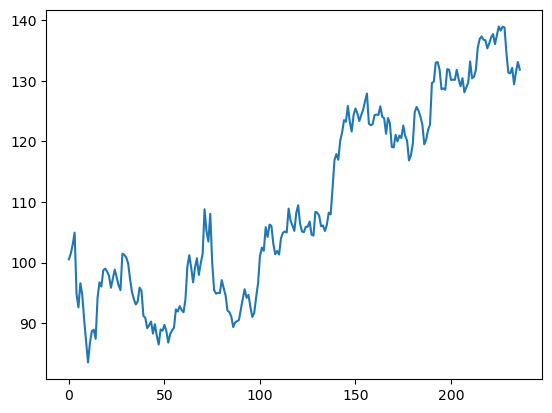

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [14]:
import numpy as np

In [15]:
df1

0      100.529999
1      101.480003
2      102.970001
3      104.930000
4       94.820000
          ...    
232    132.169998
233    129.449997
234    131.460007
235    133.130005
236    131.850006
Name: Close, Length: 237, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
df [df .columns] = Ms.fit_transform(df)
# scaler=MinMaxScaler(feature_range=(0,1))
# df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-10-20  0.287134  0.308168  0.304910  0.307027   0.307027  0.185556
2022-10-21  0.242873  0.282316  0.272794  0.324144   0.324144  0.228855
2022-10-24  0.310953  0.310041  0.311000  0.350991   0.350991  0.180577
2022-10-25  0.333646  0.347508  0.361203  0.386306   0.386306  0.239182
2022-10-26  0.210990  0.224616  0.205242  0.204144   0.204144  0.705323
...              ...       ...       ...       ...        ...       ...
2023-09-25  0.848837  0.855564  0.859727  0.877117   0.877117  0.068163
2023-09-26  0.851538  0.840296  0.825766  0.828108   0.828108  0.132365
2023-09-27  0.823893  0.846197  0.847730  0.864324   0.864324  0.114270
2023-09-28  0.847337  0.892282  0.871908  0.894414   0.894414  0.107963
2023-09-29  0.910915  0.905583  0.883536  0.871351   0.871351  0.164253

[237 rows x 6 columns]


In [18]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

KeyError: 'key of type tuple not found and not a MultiIndex'

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(86, 47)

In [ ]:
train_data

array([[0.65614171],
       [0.69272255],
       [0.75009636],
       [0.82556802],
       [0.43627267],
       [0.35078938],
       [0.50404326],
       [0.43011187],
       [0.26992691],
       [0.13785143],
       [0.        ],
       [0.12360412],
       [0.19869093],
       [0.20870256],
       [0.15055847],
       [0.41124374],
       [0.50981921],
       [0.48286486],
       [0.586446  ],
       [0.59684248],
       [0.57797464],
       [0.55102058],
       [0.47516378],
       [0.53292273],
       [0.59029654],
       [0.54331921],
       [0.49133622],
       [0.46014648],
       [0.69156713],
       [0.68502118],
       [0.66769361],
       [0.63072792],
       [0.53215245],
       [0.44897971],
       [0.40277238],
       [0.36888723],
       [0.38775507],
       [0.47593377],
       [0.45514051],
       [0.29688097],
       [0.28378908],
       [0.21794391],
       [0.23642661],
       [0.26030042],
       [0.18367363],
       [0.2433577 ],
       [0.17096659],
       [0.114

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(0,)
(0,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(0,)
(0,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

IndexError: tuple index out of range

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2023-04-26 17:46:47.042839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 17:46:47.045401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 17:46:47.047255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2023-04-26 17:46:48.133879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 17:46:48.135862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 17:46:48.137293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

23/23 [==============================] - ETA: 0s - loss: 0.0234

2023-04-26 17:46:56.330837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 17:46:56.332240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 17:46:56.333434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

23/23 [==============================] - 10s 237ms/step - loss: 0.0234 - val_loss: 0.0065
Epoch 2/100
23/23 [==============================] - 5s 201ms/step - loss: 0.0022 - val_loss: 0.0077
Epoch 3/100
23/23 [==============================] - 4s 187ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 4/100
23/23 [==============================] - 4s 154ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 5/100
23/23 [==============================] - 4s 166ms/step - loss: 0.0010 - val_loss: 0.0043
Epoch 6/100
23/23 [==============================] - 4s 186ms/step - loss: 9.9643e-04 - val_loss: 0.0054
Epoch 7/100
23/23 [==============================] - 3s 153ms/step - loss: 9.3720e-04 - val_loss: 0.0064
Epoch 8/100
23/23 [==============================] - 4s 166ms/step - loss: 9.0045e-04 - val_loss: 0.0056
Epoch 9/100
23/23 [==============================] - 3s 120ms/step - loss: 8.4478e-04 - val_loss: 0.0071
Epoch 10/100
23/23 [==============================] - 4s 187ms/step - loss: 8.8354e-04

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2023-04-26 17:53:40.625736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 17:53:40.627176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 17:53:40.628320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

24/24 [==============================] - 1s 26ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
test_predict

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

162.16529144446275

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

304.4383936641161

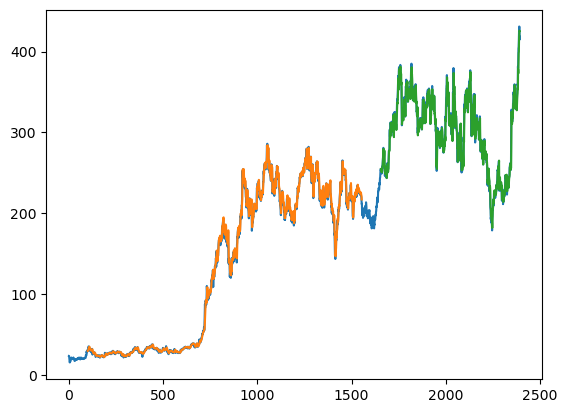

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

838

In [ ]:
x_input=test_data[(len(test_data)-100):].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.5280387193330505,
 0.5135857637732536,
 0.5280146431179138,
 0.4909668883221714,
 0.48137977076947647,
 0.49173772948047534,
 0.5083345401149756,
 0.5059979765573158,
 0.4938815845551786,
 0.49706121550772653,
 0.4711663367964237,
 0.47983812458525743,
 0.4776220095504071,
 0.4812593222466671,
 0.4960013634147451,
 0.5053957700756576,
 0.5039504600667223,
 0.49352023898675035,
 0.5149588114132158,
 0.5098280001453582,
 0.520282295031641,
 0.529315392256514,
 0.5571614512831264,
 0.5541985688962828,
 0.5525846603430907,
 0.5468275687872642,
 0.5515970320778676,
 0.5484655872791561,
 0.55595703831981,
 0.5415522327814606,
 0.5430216190055326,
 0.49961460230469434,
 0.5128390325536493,
 0.546225362305606,
 0.5451895840189355,
 0.5421544392631188,
 0.5513561711646376,
 0.5475984099455683,
 0.5232692536336212,
 0.5194151176980532,
 0.534566652047181,
 0.5401792212738873,
 0.5509707517898986,
 0.5514766196874471,
 0.5590644069033849,
 0.5809124387873371,
 0.583152704710928,
 0.58763308480

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        # x_input=x_input.reshape(1,-1)
        # x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        # x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9735691]
101
1 day input [0.51358576 0.52801464 0.49096689 0.48137977 0.49173773 0.50833454
 0.50599798 0.49388158 0.49706122 0.47116634 0.47983812 0.47762201
 0.48125932 0.49600136 0.50539577 0.50395046 0.49352024 0.51495881
 0.509828   0.5202823  0.52931539 0.55716145 0.55419857 0.55258466
 0.54682757 0.55159703 0.54846559 0.55595704 0.54155223 0.54302162
 0.4996146  0.51283903 0.54622536 0.54518958 0.54215444 0.55135617
 0.54759841 0.52326925 0.51941512 0.53456665 0.54017922 0.55097075
 0.55147662 0.55906441 0.58091244 0.5831527  0.58763308 0.59298068
 0.5808884  0.57257792 0.57758829 0.57542032 0.68381749 0.75234861
 0.75133687 0.72365949 0.72074483 0.72052804 0.7166498  0.72667052
 0.72606831 0.74861489 0.77019802 0.77405216 0.79320228 0.80486099
 0.79565926 0.8034639  0.81025681 0.80500551 0.82796162 0.81037722
 0.81666422 0.76417596 0.77212505 0.75425161 0.75996051 0.75670858
 0.76858408 0.77178786 0.76415185 0.75774436 0.77104113 0.77980921
 0.80223538 0.81153348 0.82834704 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

2394

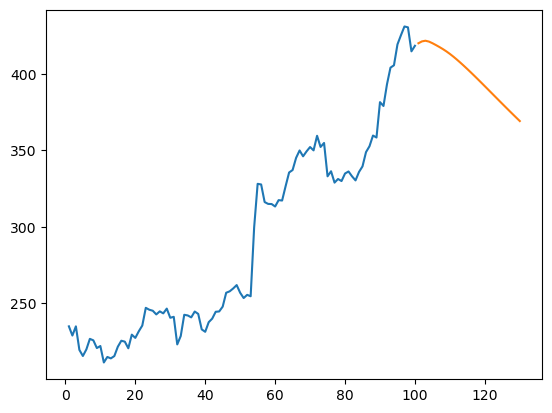

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[(len(df1)-100):]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

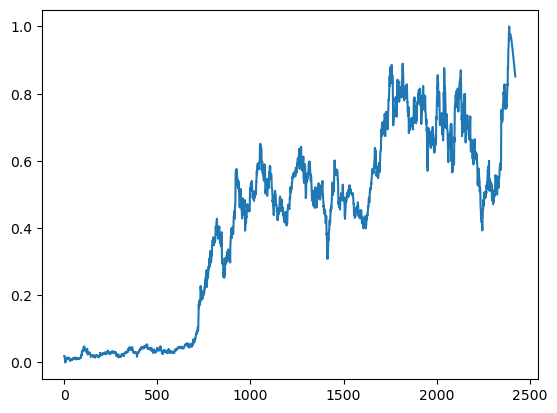

In [ ]:
combined=df1.tolist()
combined.extend(lst_output)
plt.plot(combined[:])

In [ ]:
combined=scaler.inverse_transform(combined).tolist()

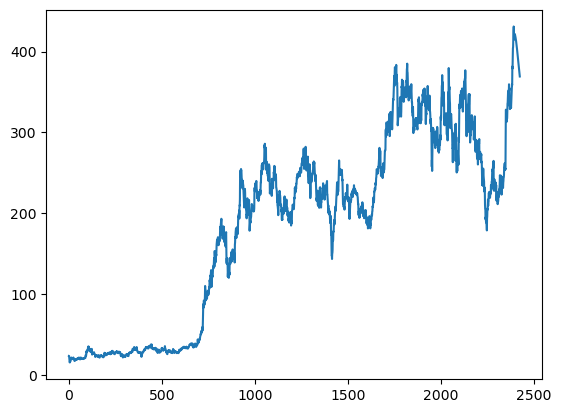

In [ ]:
plt.plot(combined)